# Задания

### Модули

In [102]:
import matplotlib.pyplot as plt
import random
import sympy as smp
import numpy as np
import math
from ecpy.curves import Curve, Point

## <font color='red'>Задание 1.</font>
Изобразить эллиптические кривые:
- с $\;D>0$;  

- с $\;D<0$;

- с самопересечением;

- с каспом.  

### Решение

Коэффициенты и дискриминант:

In [103]:
a = -1
b = 1
D = 27 * b ** 2 + 4 * a ** 3

$\href{https://ru.stackoverflow.com/questions/741048/%D0%9A%D0%B0%D0%BA-%D0%B2-matplotlib-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%8C-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA-%D0%BD%D0%B5%D1%8F%D0%B2%D0%BD%D0%BE%D0%B9-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8}{Помог}$ построить график неявной функции.

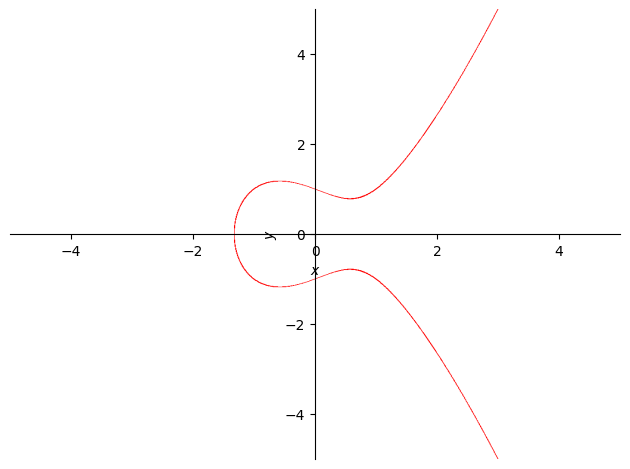

In [104]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [105]:
a = -3
b = 2
D = 27 * b ** 2 + 4 * a ** 3

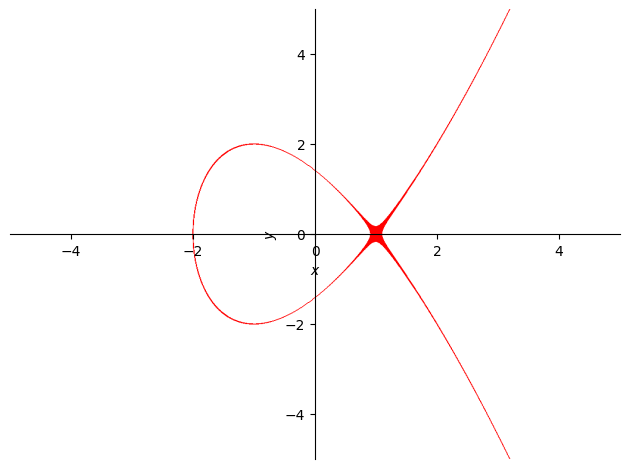

In [106]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [107]:
a = -2
b = 1
D = 27 * b ** 2 + 4 * a ** 3

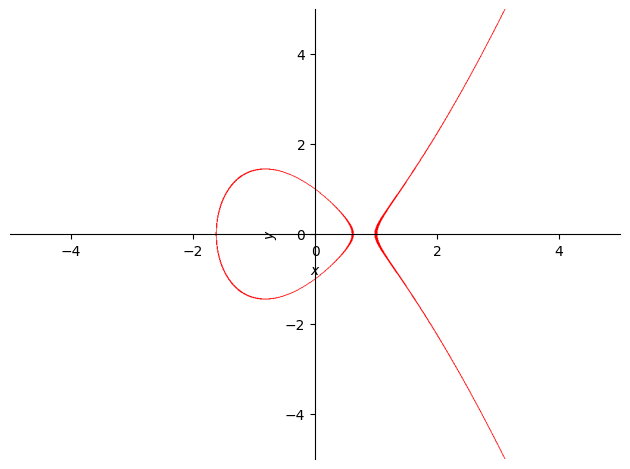

In [108]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [109]:
a = 0
b = 0
D = 27 * b ** 2 + 4 * a ** 3

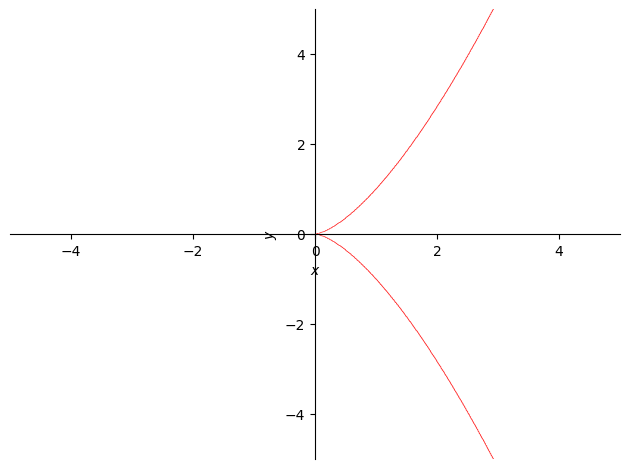

In [110]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

## <font color='red'>Задания 2 - 6.</font>

### <font color='red'>Задание 2.</font>
Реализовать класс `Curve`, который хранит $\;a, b, p\;$ эллиптической кривой
$$
  y^2=x^3+ax+b\mod p.
$$  

### <font color='red'>Задание 3.</font>
Реализовать класс `Point`, объектом которого является точка с координатами $\;(x,y)\;$ кривой `Curve`.

### <font color='red'>Задание 4.</font>
Для класса `Curve` реализовать методы нахождения всех точек кривой при помощи полного перебора и при помощи алгоритма Тонелли-Шенкса. Реализовать метод, который находит порядок кривой. Реализовать метод, который находит случайную точку кривой.

### <font color='red'>Задание 5.</font>
Для класса `Point` реализовать нахождение противоположного элемента, вычитание и сложение точек. Проверить выполнение ассоциативности.

### <font color='red'>Задание 6.</font>
Для класса `Point` реализовать операцию умножения точки на целое число.

### Решение

#### Классы

In [111]:
class My_Curve:
    """docstring"""
    
    def __init__(self, a, b, p):
        self.__a = a
        self.__b = b
        self.__p = p
        self.__pts = list(set(self.__get_points() + self.__get_shanks_points()))
        
    def get_coeffs(self):
        return self.__a, self.__b
    
    def get_mod(self):
        return self.__p
    
    def get_pts(self):
        return self.__pts
    
    def __get_points(self):
        X = [(x ** 3 + self.__a * x + self.__b) % self.__p for x in range(self.__p)]
        Y = [y ** 2 % self.__p for y in range(self.__p)]
        points = []
        for i in range(len(X)):
            for j in range(len(Y)):
                if(X[i] == Y[j]):
                    points += [[i, j]]
        points = [My_Point(pt[0], pt[1], self) for pt in points]
        return points
    
    def __get_shanks_points(self):
        points = []
        for x in range(self.__p):
            a = (pow(x, 3, self.__p) + self.__a * x + self.__b) % self.__p
            if not Jacobi(a, self.__p) == 1:
                continue
            y = Shanks(a, self.__p)
            temp_point1 = My_Point(x, y, self)
            points += [temp_point1]
        return points
    
    def get_random_point(self):
        return self.__pts[random.randint(0, len(self.__pts) - 1)]
    
    def get_order(self):
        return len(self.__pts) + 1
    
    def __repr__(self):
        return 'y^2 = x^3 + ({0}) * x + ({1}) mod {2}'.format(self.__a, self.__b, self.__p)

In [112]:
class My_Point():
    """docstring"""    
    
    def __init__(self, x, y, curve):
        self.__x = x
        self.__y = y
        self.__curve = curve
        
    def get_x(self):
        return self.__x
    
    def get_y(self):
        return self.__y
    
    def get_curve(self):
        return curve
    
    def __repr__(self):
        return '({0}, {1})'.format(self.__x, self.__y)
    
    def get_inverse_point(self):
        return My_Point(self.__x, -1 * self.__y, self.__curve)
    
    def __add__(self, other):
        a, b = self.__curve.get_coeffs()
        x1 = self.__x
        y1 = self.__y
        x2 = other.get_x()
        y2 = other.get_y()
        if (x1 == 0 and y1 == 0):
            return other
        elif(x2 == 0 and y2 == 0):
            return self
        if (x1 != x2):
            k = (y2 - y1) * pow((x2 - x1), -1, self.__curve.get_mod()) % self.__curve.get_mod()
            x3 = pow(k, 2, self.__curve.get_mod()) - x1 - x2
            y3 = k * (x1 - x3) % self.__curve.get_mod() - y1
        elif (x1 == x2 and y1 == y2 and y1 != 0):
            k = (3 * pow(x1, 2, self.__curve.get_mod()) % self.__curve.get_mod() + a) * pow(2 * y1, -1, self.__curve.get_mod()) % self.__curve.get_mod()
            x3 = pow(k, 2, self.__curve.get_mod()) - 2 * x1 % self.__curve.get_mod()
            y3 = k * (x1 - x3) % self.__curve.get_mod() - y1
        elif (x1 == x2 and y1 == y2 and y1 == 0):
            x3 = 0
            y3 = 0
        elif (x1 == x2 and y1 != y2):
            x3 = 0
            y3 = 0
        x3 %= self.__curve.get_mod()
        y3 %= self.__curve.get_mod()
        return My_Point(x3, y3, self.__curve)
        
    def __sub__(self, other):
        if isinstance(other, My_Point):
            return self + other.get_inverse_point()
        
    def __mul__(self, other):
        result = My_Point(0, 0, self.__curve)
        Q = My_Point(self.__x, self.__y, self.__curve)
        m = bin(other)[2:]
        for i in reversed(range(len(m))):
            if (m[i] == '1'):
                result = result + Q
            Q = Q + Q
        return result
    
    def __eq__(self, other):
        return self.__x % self.__curve.get_mod() == other.get_x() % self.__curve.get_mod() and self.__y % self.__curve.get_mod() == other.get_y() % self.__curve.get_mod()
    
    def __hash__(self):
        return hash((self.__x, self.__y))

#### Вспомогательные функции

In [113]:
def st(n):
    s = 0
    t = n
    while t % 2 == 0:
        s += 1
        t = t // 2
    return s, t

def Jacobi(a,n):
    if n < 0 or not n % 2:
        raise ValueError("n should be an odd positive integer") 
    j = 1
    if n == 1:
        return j
    if a<0:
        a = -a
        if n%4 == 3:
            j = -j
    while n>1:
        if a == 0:
            return 0
        s,t = st(a)
        if (s%2 == 1) & (n%8 in [3, 5]):
            j = -j
        if 3 == n%4 == t%4:
            j = -j
        a = n%t
        n = t
    return j

def Shanks(a, p):
    if not Jacobi(a, p) == 1:
        raise ValueError("a should be a quadratic residue")
    s, t = st(p-1)
    import random
    n = random.randint(2, p - 2)
    while Jacobi(n, p) == 1:
        n = random.randint(2, p - 2)
    b = pow(n, t, p)
    r = pow(int(a), (t+1)//2, p)
    d = 0
    f = pow(int(a), t, p)
    b2 = b
    for i in range(1,s):
        b2 = b2 * b2 % p
        if not pow(f, 2 ** (s - 1 - i), p) == 1:
            d += 2 ** i
            f = f * b2 % p 
    return r*pow(b, d//2, p) % p

#### Проверка точек

In [114]:
curve1 = My_Curve(-1, 1, 13)

In [115]:
point1 = My_Point(4, 3, curve1)
point1

(4, 3)

In [116]:
point1.get_inverse_point()

(4, -3)

In [117]:
point2 = My_Point(1, 1, curve1)
point3 = point1 + point2

In [118]:
point3

(7, 8)

In [119]:
My_Point(4, 10, curve1) + My_Point(4, 3, curve1)

(0, 0)

In [120]:
point1 - point2

(4, 10)

In [121]:
point1 * 4

(12, 1)

In [122]:
p1 = curve1.get_random_point()
p2 = curve1.get_random_point()
print(p1, " + ", p2, " = ", p1 + p2)

(7, 8)  +  (6, 9)  =  (1, 12)


#### Проверка ассоциативности

In [123]:
P = curve1.get_random_point()
Q = curve1.get_random_point()
while Q == P:
    Q = curve1.get_random_point()
R = curve1.get_random_point()
while R == P or R == Q:
    R = curve1.get_random_point()
print(P, Q, R)

(5, 2) (7, 8) (1, 12)


In [124]:
(P + Q) + R

(5, 11)

In [125]:
P + (Q + R)

(5, 11)

In [126]:
((P + Q) + R) == (P + (Q + R))

True

#### Из библиотеки

In [127]:
# help(Curve);

#### Проверка кривых

In [128]:
curve1.get_pts()

[(0, 1),
 (1, 12),
 (3, 8),
 (4, 10),
 (5, 11),
 (12, 1),
 (4, 3),
 (10, 4),
 (1, 1),
 (6, 4),
 (0, 12),
 (12, 12),
 (7, 8),
 (10, 9),
 (7, 5),
 (6, 9),
 (3, 5),
 (5, 2)]

In [129]:
curve1.get_random_point()

(6, 9)

In [130]:
curve2 = My_Curve(4, 20, 59)

In [131]:
curve2.get_order()

56

In [132]:
curve2.get_pts()

[(4, 49),
 (13, 33),
 (37, 9),
 (23, 19),
 (30, 0),
 (41, 55),
 (43, 52),
 (50, 9),
 (57, 57),
 (57, 2),
 (17, 24),
 (23, 40),
 (51, 19),
 (31, 50),
 (25, 13),
 (53, 4),
 (13, 26),
 (51, 40),
 (10, 36),
 (3, 0),
 (32, 42),
 (12, 12),
 (52, 48),
 (34, 15),
 (20, 28),
 (25, 46),
 (20, 31),
 (1, 54),
 (2, 53),
 (52, 11),
 (24, 4),
 (58, 30),
 (0, 16),
 (1, 5),
 (17, 35),
 (10, 23),
 (27, 39),
 (32, 17),
 (44, 19),
 (53, 55),
 (37, 50),
 (31, 9),
 (44, 40),
 (50, 50),
 (0, 43),
 (4, 10),
 (41, 4),
 (27, 20),
 (24, 55),
 (43, 7),
 (26, 0),
 (34, 44),
 (2, 6),
 (12, 47),
 (58, 29)]

## <font color='red'>Задание 7.</font>
Найти циклическую и нециклическую группы точек эллиптической кривой с составным порядком. Найти группу точек эллиптической кривой с простым порядком. Является ли она циклической?

### Решение

In [133]:
curve3 = My_Curve(1, 3, 13)

In [134]:
pts3 = curve3.get_pts()

In [135]:
pts3

[(6, 2),
 (9, 0),
 (0, 4),
 (8, 4),
 (10, 5),
 (6, 11),
 (10, 8),
 (12, 1),
 (5, 4),
 (0, 9),
 (2, 0),
 (8, 9),
 (12, 12),
 (5, 9)]

In [147]:
rand_pt = curve3.get_random_point()
n = 3
print(rand_pt, " * ", n, " = ", rand_pt * n)

(0, 4)  *  3  =  (10, 5)


In [150]:
rand_pt *3

(10, 5)

In [137]:
curve3.get_order()

15

In [138]:
inf = My_Point(0, 0, curve3)

In [160]:
for i in pts3:
    j = 2
    print("\n")
    print(i, 1)
    pt = i
    while(pt != inf):
        pt = i * j
        print(pt, j)
        j += 1



(6, 2) 1
(5, 9) 2
(12, 1) 3
(12, 12) 4
(5, 4) 5
(6, 11) 6
(0, 0) 7


(9, 0) 1
(0, 0) 2


(0, 4) 1
(12, 1) 2
(10, 5) 3
(6, 11) 4
(8, 4) 5
(5, 9) 6
(9, 0) 7
(5, 4) 8
(8, 9) 9
(6, 2) 10
(10, 8) 11
(12, 12) 12
(0, 9) 13
(0, 0) 14


(8, 4) 1
(6, 2) 2
(0, 4) 3
(5, 9) 4
(10, 8) 5
(12, 1) 6
(9, 0) 7
(12, 12) 8
(10, 5) 9
(5, 4) 10
(0, 9) 11
(6, 11) 12
(8, 9) 13
(0, 0) 14


(10, 5) 1
(5, 9) 2
(8, 9) 3
(12, 12) 4
(0, 4) 5
(6, 11) 6
(9, 0) 7
(6, 2) 8
(0, 9) 9
(12, 1) 10
(8, 4) 11
(5, 4) 12
(10, 8) 13
(0, 0) 14


(6, 11) 1
(5, 4) 2
(12, 12) 3
(12, 1) 4
(5, 9) 5
(6, 2) 6
(0, 0) 7


(10, 8) 1
(5, 4) 2
(8, 4) 3
(12, 1) 4
(0, 9) 5
(6, 2) 6
(9, 0) 7
(6, 11) 8
(0, 4) 9
(12, 12) 10
(8, 9) 11
(5, 9) 12
(10, 5) 13
(0, 0) 14


(12, 1) 1
(6, 11) 2
(5, 9) 3
(5, 4) 4
(6, 2) 5
(12, 12) 6
(0, 0) 7


(5, 4) 1
(12, 1) 2
(6, 2) 3
(6, 11) 4
(12, 12) 5
(5, 9) 6
(0, 0) 7


(0, 9) 1
(12, 12) 2
(10, 8) 3
(6, 2) 4
(8, 9) 5
(5, 4) 6
(9, 0) 7
(5, 9) 8
(8, 4) 9
(6, 11) 10
(10, 5) 11
(12, 1) 12
(0, 4) 13
(0, 0) 14


(2, 0) 

А теперь простой порядок

In [162]:
curve4 = My_Curve(1, 3, 17)

In [163]:
pts4 = curve3.get_pts()

In [164]:
pts4

[(6, 2),
 (9, 0),
 (0, 4),
 (8, 4),
 (10, 5),
 (6, 11),
 (10, 8),
 (12, 1),
 (5, 4),
 (0, 9),
 (2, 0),
 (8, 9),
 (12, 12),
 (5, 9)]

In [165]:
curve4.get_order()

17

In [144]:
inf = My_Point(0, 0, curve4)

In [167]:
for i in pts4:
    j = 2
    print("\n")
    print(i, 1)
    pt = i
    while(pt != inf):
        pt = i * j
        print(pt, j)
        j += 1



(6, 2) 1
(5, 9) 2
(12, 1) 3
(12, 12) 4
(5, 4) 5
(6, 11) 6
(0, 0) 7


(9, 0) 1
(0, 0) 2


(0, 4) 1
(12, 1) 2
(10, 5) 3
(6, 11) 4
(8, 4) 5
(5, 9) 6
(9, 0) 7
(5, 4) 8
(8, 9) 9
(6, 2) 10
(10, 8) 11
(12, 12) 12
(0, 9) 13
(0, 0) 14


(8, 4) 1
(6, 2) 2
(0, 4) 3
(5, 9) 4
(10, 8) 5
(12, 1) 6
(9, 0) 7
(12, 12) 8
(10, 5) 9
(5, 4) 10
(0, 9) 11
(6, 11) 12
(8, 9) 13
(0, 0) 14


(10, 5) 1
(5, 9) 2
(8, 9) 3
(12, 12) 4
(0, 4) 5
(6, 11) 6
(9, 0) 7
(6, 2) 8
(0, 9) 9
(12, 1) 10
(8, 4) 11
(5, 4) 12
(10, 8) 13
(0, 0) 14


(6, 11) 1
(5, 4) 2
(12, 12) 3
(12, 1) 4
(5, 9) 5
(6, 2) 6
(0, 0) 7


(10, 8) 1
(5, 4) 2
(8, 4) 3
(12, 1) 4
(0, 9) 5
(6, 2) 6
(9, 0) 7
(6, 11) 8
(0, 4) 9
(12, 12) 10
(8, 9) 11
(5, 9) 12
(10, 5) 13
(0, 0) 14


(12, 1) 1
(6, 11) 2
(5, 9) 3
(5, 4) 4
(6, 2) 5
(12, 12) 6
(0, 0) 7


(5, 4) 1
(12, 1) 2
(6, 2) 3
(6, 11) 4
(12, 12) 5
(5, 9) 6
(0, 0) 7


(0, 9) 1
(12, 12) 2
(10, 8) 3
(6, 2) 4
(8, 9) 5
(5, 4) 6
(9, 0) 7
(5, 9) 8
(8, 4) 9
(6, 11) 10
(10, 5) 11
(12, 1) 12
(0, 4) 13
(0, 0) 14


(2, 0) 